In [191]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Life History Traits and Cancer Resistance in Mammals

The data is adapted from Tollis et al. (2020) <i> The Evolution of Human Cancer Gene Duplications Across Mammals</i>. Please note "adapted" means that the underlying data and the analyses here are slightly different that what was used in the study, so we don't expect the exact same answers.

Let's load the table with life history data and cancer gene copy numbers for 62 mamamls.

In [192]:
tsgs = Table().read_table('species_data.csv')
tsgs

Common_Name,Genus_Species,Superorder,Order,Body_Mass_g,Log_Body_Mass,Longevity_y,Log_Longevity,Longevity_Quotient,Total_TSGs,Total_TSGs_Normalized,Total_Oncogenes,Total_Oncogenes_Normalized,GS_TSG_Numbers,GS_TSG_normalized,Somatic_normalized,Germline_normalized,Oncogene_copies,Oncogene_normalized
African Savanna Elephant,Loxodonta_africana,Afrotheria,Proboscidea,4.5e+06,6.65321,80,1.90309,0.976974,387,1.65385,465,2.03947,55,1.27907,1.83333,1.2069,228,2.03947
Alpaca,Vicugna_pacos,Laurasiatheria,Artiodactyla,62000,4.79239,25.8,1.41162,0.978815,366,1.5641,480,2.11454,54,1.25581,1.74375,1.06452,227,2.11454
American Bison,Bison_bison,Laurasiatheria,Artiodactyla,624577,5.79559,33.5,1.52504,0.889322,442,1.90517,498,2.21333,51,1.2439,2.24528,1.0625,225,2.21333
Antarctic Fur Seal,Arctocephalus_gazella,Laurasiatheria,Carnivora,67979.4,4.83238,30.6,1.48572,1.02249,420,1.80258,507,2.27354,58,1.38095,2,1.375,223,2.27354
Antarctic Minke Whale,Balaenoptera_bonaerensis,Laurasiatheria,Cetacea,7.5e+06,6.87506,50,1.69897,0.927838,399,1.84722,437,2.03256,54,1.42105,2.09655,1.24242,215,2.03256
Arabian Camel,Camelus_dromedarius,Laurasiatheria,Artiodactyla,434000,5.63749,40,1.60206,0.958245,372,1.58974,464,2.0262,56,1.30233,1.77987,1.03125,229,2.0262
Bactrian Camel,Camelus_bactrianus,Laurasiatheria,Artiodactyla,475000,5.67669,40,1.60206,0.952176,358,1.5431,465,2.02174,52,1.2381,1.72327,1.03226,230,2.02174
Beluga Whale,Delphinapterus_leucas,Laurasiatheria,Cetacea,1.38e+06,6.13988,40,1.60206,0.88589,442,1.88889,508,2.24779,57,1.35714,2.16981,1.21212,226,2.24779
Black Bear,Ursus_americanus,Laurasiatheria,Carnivora,132405,5.1219,34,1.53148,0.999834,403,1.70763,523,2.32444,64,1.48837,1.89241,1.14706,225,2.32444
Bowhead Whale,Balaena_mysticetus,Laurasiatheria,Cetacea,8e+07,7.90309,211,2.32428,1.01601,444,1.89744,479,2.12889,55,1.30952,2.19497,1.21212,225,2.12889


Is body mass related to lifespan in mammals?

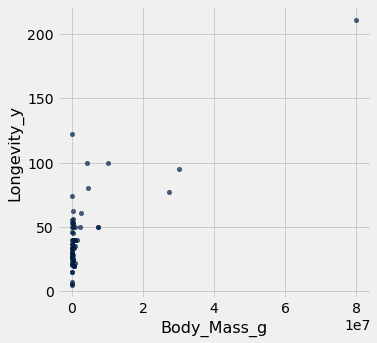

In [193]:
tsgs.scatter('Body_Mass_g', 'Longevity_y')

Seems like it is, but there are some very large and long lived mammals, and some really tiny ones, so it is difficult to visualize. 

Often when continuous variables range across very wide values, scientists use the log10 of the variables to visualize the relationship.

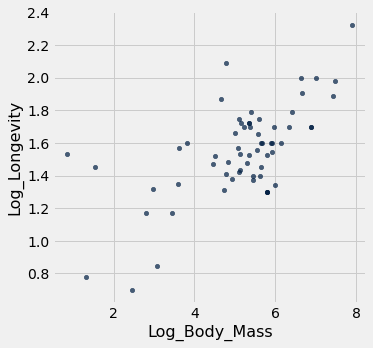

In [54]:
tsgs.scatter('Log_Body_Mass', 'Log_Longevity')

Which mammal is the largest in our dataset?

In [194]:
tsgs.sort('Body_Mass_g', descending=True).show(5)

Common_Name,Genus_Species,Superorder,Order,Body_Mass_g,Log_Body_Mass,Longevity_y,Log_Longevity,Longevity_Quotient,Total_TSGs,Total_TSGs_Normalized,Total_Oncogenes,Total_Oncogenes_Normalized,GS_TSG_Numbers,GS_TSG_normalized,Somatic_normalized,Germline_normalized,Oncogene_copies,Oncogene_normalized
Bowhead Whale,Balaena_mysticetus,Laurasiatheria,Cetacea,8e+07,7.90309,211,2.32428,1.01601,444,1.89744,479,2.12889,55,1.30952,2.19497,1.21212,225,2.12889
Humpback Whale,Megaptera_novaeangliae,Laurasiatheria,Cetacea,3e+07,7.47712,95,1.97772,0.910604,421,1.79915,497,2.18943,57,1.32558,2.05031,1.1875,227,2.18943
Grey Whale,Eschrichtius_robustus,Laurasiatheria,Cetacea,2.73e+07,7.43616,77,1.88649,0.873073,446,1.91416,523,2.30396,60,1.42857,2.17722,1.27273,227,2.30396
Sperm Whale,Physeter_catodon,Laurasiatheria,Cetacea,1.01e+07,7.00432,100,2,0.978773,441,1.8766,489,2.14474,57,1.35714,2.15094,1.23529,228,2.14474
Antarctic Minke Whale,Balaenoptera_bonaerensis,Laurasiatheria,Cetacea,7.5e+06,6.87506,50,1.69897,0.927838,399,1.84722,437,2.03256,54,1.42105,2.09655,1.24242,215,2.03256


Which mammals are the smallest?

In [195]:
tsgs.sort('Body_Mass_g', descending=False).show(5)

Common_Name,Genus_Species,Superorder,Order,Body_Mass_g,Log_Body_Mass,Longevity_y,Log_Longevity,Longevity_Quotient,Total_TSGs,Total_TSGs_Normalized,Total_Oncogenes,Total_Oncogenes_Normalized,GS_TSG_Numbers,GS_TSG_normalized,Somatic_normalized,Germline_normalized,Oncogene_copies,Oncogene_normalized
Little Brown Bat,Myotis_lucifugus,Laurasiatheria,Chiroptera,7.15,0.854306,34,1.53148,2.99232,409,1.78603,567,2.56561,75,1.82927,1.86452,1.36364,221,2.56561
Mouse,Mus_musculus,Euarchontoglires,Rodentia,20.5,1.31175,6,0.778151,1.56843,442,1.94714,728,3.29412,74,1.72093,2.12102,1.2963,221,3.29412
Naked Mole Rat,Heterocephalus_glaber,Euarchontoglires,Rodentia,35,1.54407,28.3,1.45179,2.59582,556,2.38627,756,3.40541,87,2.02326,2.5125,2.23333,222,3.40541
Rat,Rattus_norvegicus,Euarchontoglires,Rodentia,280,2.44716,5,0.69897,0.868569,440,1.93833,744,3.36652,63,1.46512,2.12179,1.64286,221,3.36652
Guinea Pig,Cavia_porcellus,Euarchontoglires,Rodentia,639.1,2.80557,14.8,1.17026,1.29719,390,1.73333,467,2.11312,62,1.5122,1.89241,1.11538,221,2.11312


We would like to know if large animals also have very long lives. To do this, we will test for a correlation between body mass and lifespan.

In [196]:
# first we will convert to standard units:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  

In [227]:
# we will print a table that contains body mass and longevity in standard units
tsgs_SU = Table().with_columns('Body_Mass_SU', standard_units(tsgs.column('Body_Mass_g')),
                              'Longevity_SU', standard_units(tsgs.column('Longevity_y')))
tsgs_SU

Body_Mass_SU,Longevity_SU
0.127565,1.14779
-0.26981,-0.568808
-0.219437,-0.324937
-0.269274,-0.416784
0.396183,0.197645
-0.236501,-0.119071
-0.23283,-0.119071
-0.151797,-0.119071
-0.263506,-0.309101
6.88777,5.29678


In [228]:
# this function will calculate the correlation coefficient of two variables provided in the arguments
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))


<b>Question 1.</b> In the following cell, provide the arguments to the "correlation" function to calculate the correlation coefficient. Then, explain how you interpret the <b>correlation coefficient</b>.

In [ ]:
massLife = ...
massLife

Enter your written explanation here.

Here is a regression fit line so you can visualize the relationship between body mass and longevity.

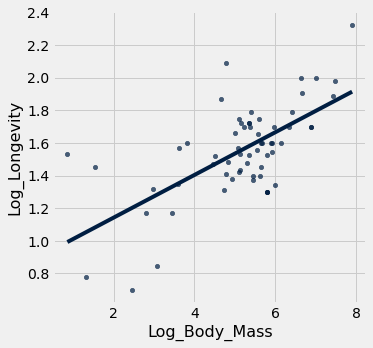

In [200]:
tsgs.scatter('Log_Body_Mass', 'Log_Longevity', fit_line=True)

You can see a lot of variation around the line. This means that while body mass and longevity are related, some animals live much longer than other animals with a similar body mass.

To measure how much longer a species lives compared to other species it's same size, we calculated the <b>longevity quotient</b>, which essentially is the difference between the observed longevity (in years) and expected longevity (given the regression line above). You don't have to worry about how we calculated this, but it is a column in the data table "Longevity_Quotient".

<b>Question 2.</b> Draw a scatter plot where Log Body Mass is on the x-axis and Longevity Quotient is on the y-axis.

In [ ]:
MassVlq = ...
MassVlq

<b>Question 3.</b> Use the same function as above to calculate the correlation coefficient between Body Mass (in grams) and Longevity Quotient. Explain how to interpret this correlation coefficient.

In [ ]:
...

Enter your written explanation here.

<b>Question 4a.</b> What species have the highest longevity quotients?
Hint: use .sort

In [ ]:
...

<b>Question 4b.</b> What species have the lowest longevity quotients?
Hint: use .sort

In [ ]:
...

<b>Quesion 5.</b> Which species have a longevity quotient between 0.97 and 1.03? What does this tell us about these species' relationships between their body mass and lifespan?

In [ ]:
...

Provide your written explanation here.

<b>Question 6.</b> What is the longevity quotient for humans? Can you give an explanation as to why the human LQ is high or low? Full credit if you use numpy functions.

In [ ]:
...

Provide your written explanation here.

<b>Question 7a.</b> Which animal has the most Total TSGs normalized?

In [ ]:
...

<b>Question 7b.</b> Which animal has the least Total TSGs normalized?

In [ ]:
...

<b>Question 8a.</b> Use the function above to calculate the correlation coefficient between Total Oncogenes Normalized and Total TSGs Normalized.

In [ ]:
...

<b>Question 8b.</b> Draw a scatter plot showing the relationship between Total Oncogenes Normalized and Total TSGs Normalized.

In [ ]:
...

<b>Question 9a.</b> Draw a scatter plot showing the relationship between Total Oncogenes Normalized and Total TSGs Normalized.

In [ ]:
...

<b>Question 9b.</b> Use the function from above to calculate the correlation coefficient between Longevity Quotient and Total TSGs Normalized.

In [ ]:
...

In our study, we learned that if you further parse tumor suppressor genes into those that are mutated in the germline, somatically (meaning in the body as cells divide), or those that are mutated in <b>BOTH</b> germline and soma,that you get some very different answers.

In the tsgs table, the column containing the counts for tumor suppressor genes that are mutated in both germline and soma is labelled "GS_TSG_normalized".

<b>Question 10a.</b> Draw a scatter plot showing the relationship between Total Oncogenes Normalized and GS_TSG_normalized.

In [ ]:
...

<b>Question 10b.</b> Use the function from above to calculate the correlation coefficient between Longevity Quotient and GS_TSG_normalized.

In [ ]:
...

<b>Extra Credit (5 points).</b> What is the relationship between tumor suppressor gene copy number and body mass? Show your code for how you figured it out.